# **Neural Network V. Multiple Linear Regress (US HOUSING DATA)**

This dataset was sourced from Kaggle.com. it contains information from the U.S.A census. The data pertains to the houses found in the U.S. and some summary stats about them based on the 1990 census data. It has an easily understandable list of variables with optimal size. This data has 7 variables with 5000 observations. However, the address column was dropped as it isn’t relevant to our study. This project is to analyse and compare linear multiple regression to neural networks. also, look further to investigate if simple or complex topology or architect influences the performance of the models.

In [ ]:
## installing packages
install.packages('neuralnet')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘Deriv’




In [ ]:
#loading packages
library(neuralnet)


Attaching package: ‘neuralnet’


The following object is masked from ‘package:dplyr’:

    compute




In [65]:
#loading in data
data <- read.table("USA_Housing.csv", sep = ",", header = TRUE)
colnames(data)

[1] "Avg..Area.Income"             "Avg..Area.House.Age"         
[3] "Avg..Area.Number.of.Rooms"    "Avg..Area.Number.of.Bedrooms"
[5] "Area.Population"              "Price"                       
[7] "Address"

In [66]:
#checking minimum requirement of at least 200 obs. & 5 variables
str(data)
summary(data)

'data.frame':	5000 obs. of  7 variables:
 $ Avg..Area.Income            : num  79545 79249 61287 63345 59982 ...
 $ Avg..Area.House.Age         : num  5.68 6 5.87 7.19 5.04 ...
 $ Avg..Area.Number.of.Rooms   : num  7.01 6.73 8.51 5.59 7.84 ...
 $ Avg..Area.Number.of.Bedrooms: num  4.09 3.09 5.13 3.26 4.23 4.04 3.41 2.42 2.3 6.1 ...
 $ Area.Population             : num  23087 40173 36882 34310 26354 ...
 $ Price                       : num  1059034 1505891 1058988 1260617 630943 ...
 $ Address                     : chr  "208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101" "188 Johnson Views Suite 079\nLake Kathleen, CA 48958" "9127 Elizabeth Stravenue\nDanieltown, WI 06482-3489" "USS Barnett\nFPO AP 44820" ...


 Avg..Area.Income Avg..Area.House.Age Avg..Area.Number.of.Rooms
 Min.   : 17797   Min.   :2.644       Min.   : 3.236           
 1st Qu.: 61481   1st Qu.:5.322       1st Qu.: 6.299           
 Median : 68804   Median :5.970       Median : 7.003           
 Mean   : 68583   Mean   :5.977       Mean   : 6.988           
 3rd Qu.: 75783   3rd Qu.:6.651       3rd Qu.: 7.666           
 Max.   :107702   Max.   :9.519       Max.   :10.760           
 Avg..Area.Number.of.Bedrooms Area.Population       Price        
 Min.   :2.000                Min.   :  172.6   Min.   :  15939  
 1st Qu.:3.140                1st Qu.:29403.9   1st Qu.: 997577  
 Median :4.050                Median :36199.4   Median :1232669  
 Mean   :3.981                Mean   :36163.5   Mean   :1232073  
 3rd Qu.:4.490                3rd Qu.:42861.3   3rd Qu.:1471210  
 Max.   :6.500                Max.   :69621.7   Max.   :2469066  
   Address         
 Length:5000       
 Class :character  
 Mode  :character  
          

In [67]:
#cleaning data to remove non-numeric variables, NAs & easily readble col names
data = subset(data, select = -c(Address))
sum(is.na(data))

[1] 0

In [68]:
colnames(data) <- c("A.Income", "A.house.age", "A.num.rooms",
                    "A.num.bedrooms","Population","Price")
names(data)

[1] "A.Income"       "A.house.age"    "A.num.rooms"    "A.num.bedrooms"
[5] "Population"     "Price"

# **Building Neural Networks**

In [70]:
# custom normalization function
normalize <- function(x) { return((x - min(x)) / (max(x) - min(x)))}


In [71]:
# apply normalization to entire data frame
data_norm <- as.data.frame(lapply(data, normalize))


In [72]:
# confirm that the range
summary(data_norm$Price)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.4002  0.4960  0.4957  0.5932  1.0000 

In [73]:
# compared to the original minimum and maximum
summary(data$Price)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  15939  997577 1232669 1232073 1471210 2469066 

In [74]:
# spliting data into training and test data
data_train <- data_norm[1:3000, ]
data_test <- data_norm[3001:5000, ]

In [75]:
# creating training and test data with random observations
ind_train <- sample(1:dim(data_norm)[1], size = 3000)
data_train <- data_norm[ind_train, ]
data_test <- data_norm[-ind_train, ]

In [76]:
# #train the neuralnet model
# simple ANN with only a single hidden layer and a neuron
set.seed(12345) # in order to reproduce results
data_model <- neuralnet(formula = Price ~ A.Income + A.house.age +
                          A.num.rooms+ A.num.bedrooms + Population,
                        data = data_train)

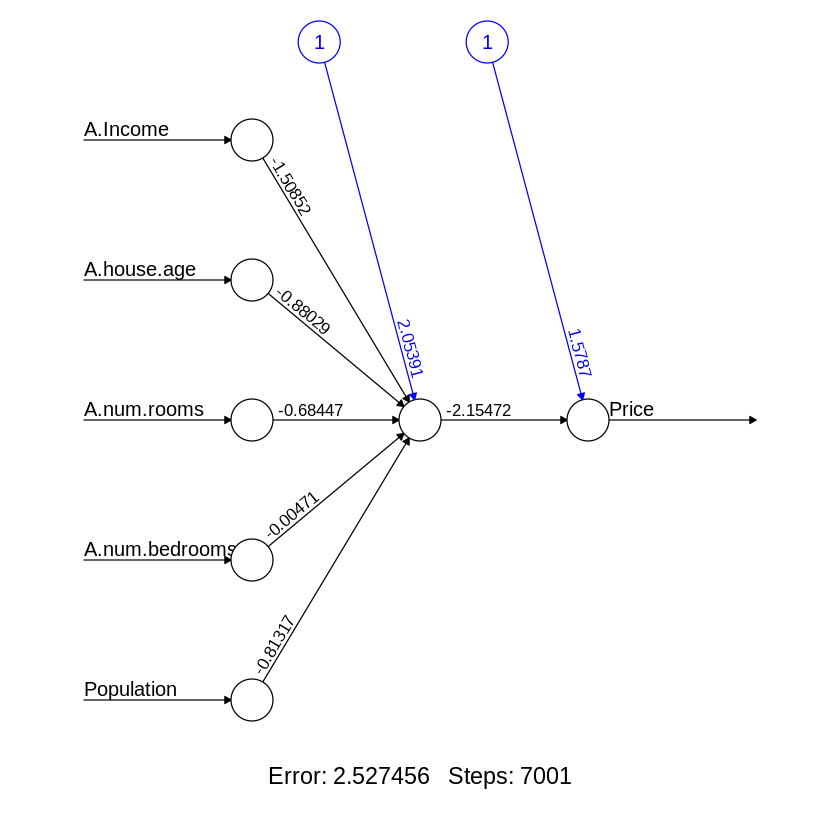

In [77]:
# visualize the network topology
plot(data_model, rep = "best")

In [78]:
# obtain model results
model_results <- compute(data_model, data_test[1:5])

In [79]:
# obtain predicted price values
predicted_price <- model_results$net.result

In [80]:
# examine the correlation between predicted and actual values
COR.model <- cor(predicted_price, data_test$Price)
COR.model

0.9577929


In [81]:
# testing MSE errors
MSE.model= mean((predicted_price - data_test$Price)^2)
MSE.model

[1] 0.001726157

# **Improving and evaluating the model performance**

In [82]:
# more complex neural network topology with 8 hidden neurons
set.seed(12345)
data_model2 <- neuralnet(Price ~ A.Income + A.house.age +
                           A.num.rooms+ A.num.bedrooms + Population,
                             data = data_train, hidden = 8)

In [83]:
# evaluating the results
model_results2 <- compute(data_model2, data_test[1:5])
predicted_price2 <- model_results2$net.result
COR.model2 <- cor(predicted_price2, data_test$Price)
COR.model2

0.9575104


In [84]:
# testing MSE errors
MSE.model2= mean((predicted_price2 - data_test$Price)^2)
MSE.model2

[1] 0.001737896

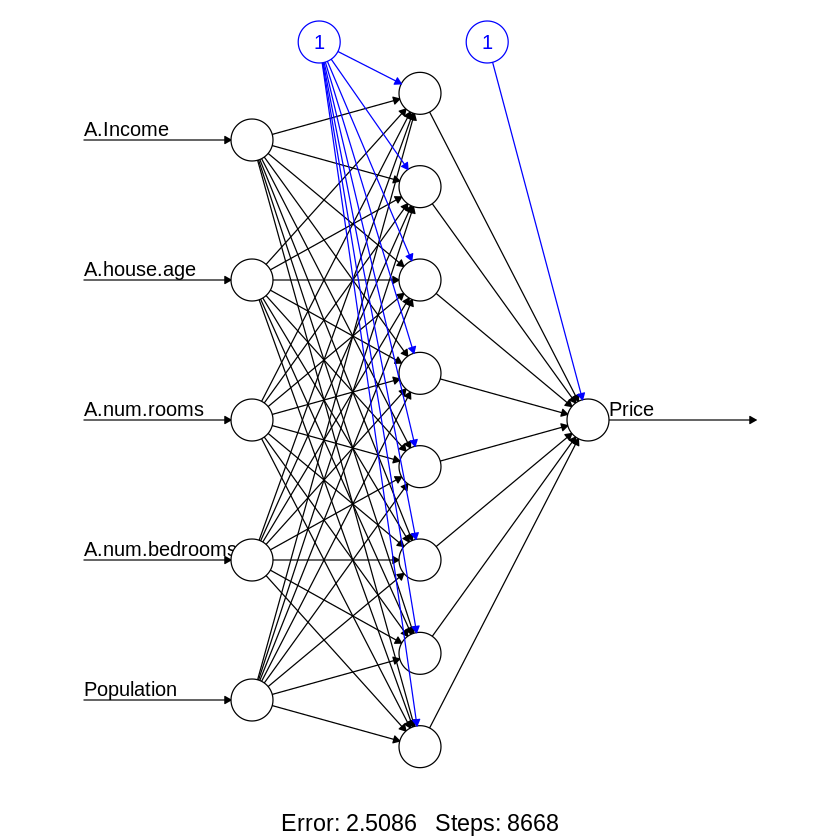

In [85]:
# plotting the network
plot(data_model2, information = T, show.weights = F, rep = "best")

A simple and basic neural network was built with a default setting (one hidden layer, one hidden neuron) with a correlation of about 0.9574627, which shows a strong relationship between the actual and predicted values and an MSE of 0.001763188. Therefore, this model works well on this data. A complex model was built to improve performance and prevent overfitting. A single layer with 8 neurons was established with a correlation of about 0.9568242 with an MSE of 0.001791015 and a slight drop in error from 2.571454 to 2.475299. even though a bit more complex and work also works quite well with the data, the single hidden layer and one neuron network model has a better and stronger relationship between predicted and actual values.

## ** further Improvement in model performance.**

In [86]:
# an even more complex neural network topology with 2 hidden layers and 11 and 8 hidden neurons, respectively
set.seed(12345)
data_model3 <- neuralnet(Price ~ A.Income + A.house.age + A.num.rooms+ A.num.bedrooms +
                           Population, data = data_train, hidden = c(11, 8))

In [87]:
# evaluate the results as we did before
model_results3 <- compute(data_model3, data_test[1:5])
predicted_price3 <- model_results3$net.result
COR.model3 <- cor(predicted_price3, data_test$Price)
COR.model3

0.9570621


In [88]:
# testing MSE errors
MSE.model3= mean((predicted_price3 - data_test$Price)^2)
MSE.model3

[1] 0.001755387

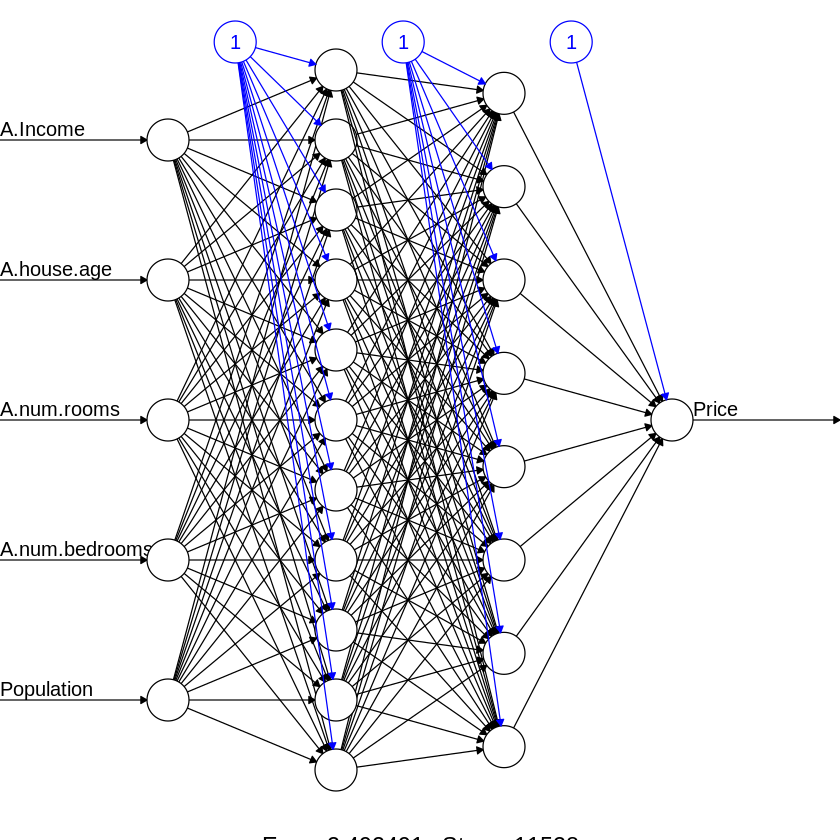

In [89]:
# plotting the network
plot(data_model3, information = T, show.weights = F, rep = "best")

this model is made up of two hidden layers with eleven and eight neurons on each layer, respectively, yet it has the lowest correlation of 0.9565941 among all the three generated models and with an MSE of 0.001798744, which shows that the more complex the model becomes, the slight decrease in correlation and the slight increase in MSE. Unlike the first data and analysis, this neutral network decreases in performance with many complexities added.

# **multiple linear regression**

In [90]:
set.seed(12345)
data_modelO <- lm(Price ~ A.Income + A.house.age + A.num.rooms+ A.num.bedrooms +
                    Population,data = data_train,)
summary(data_modelO)


Call:
lm(formula = Price ~ A.Income + A.house.age + A.num.rooms + A.num.bedrooms + 
    Population, data = data_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.13889 -0.02827  0.00022  0.02806  0.15177 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    -0.587763   0.006019 -97.646   <2e-16 ***
A.Income        0.799993   0.006294 127.105   <2e-16 ***
A.house.age     0.466964   0.005154  90.601   <2e-16 ***
A.num.rooms     0.362421   0.006318  57.363   <2e-16 ***
A.num.bedrooms  0.002756   0.003093   0.891    0.373    
Population      0.431208   0.005245  82.214   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04105 on 2994 degrees of freedom
Multiple R-squared:  0.9183,	Adjusted R-squared:  0.9182 
F-statistic:  6732 on 5 and 2994 DF,  p-value: < 2.2e-16


In [91]:
# test the fitted model
model_resultsO <- as.numeric(data_modelO$coefficients[1:5] %*% t(data_test[,1:5]) +
                               data_modelO$coefficients[6])
COR.modelO <- cor(model_resultsO, data_test$Price)
COR.modelO

[1] 0.2551891

In [92]:
# testing MSE errors
MSE.modelO= mean((model_resultsO - data_test$Price)^2)
MSE.modelO

[1] 0.1878778

#** Evaluation and Comparison of Models**

In [94]:
### Saving all MSE results in a data frame
MSE.all = data.frame(cbind(MSE.model, MSE.model2, MSE.model3, MSE.modelO),
                     row.names = "MSE")
# layer to neuron ratio (layer : neuron) representing col names
colnames(MSE.all) = c("1:1", "1:11", "2:11:8", "lm")
MSE.all

,1:1,1:11,2:11:8,lm
,<dbl>,<dbl>,<dbl>,<dbl>
MSE,0.001726157,0.001737896,0.001755387,0.1878778


In [95]:
### Saving all correlation results in a data frame
COR.all = data.frame(cbind(COR.model, COR.model2, COR.model3, COR.modelO),
                     row.names = "COR")
# layer to neuron ratio (layer : neuron) representing col names
colnames(COR.all) = c("1:1", "1:11", "2:11:8", "lm")
COR.all

,1:1,1:11,2:11:8,lm
,<dbl>,<dbl>,<dbl>,<dbl>
COR,0.9577929,0.9575104,0.9570621,0.2551891


Except for the multiple linear regression model, which is least correlated (0.2281771) and with
the high MSE of 0.1939753, all other models can be relatively considered because they show
a reasonable and strong relationship between actual and predicted values. However, the first
model (1 layer and a neuron) best fits this case because it has the highest correlation of
0.9574627 and the least MSE of 0.001763188.

# **complete 10x10 correlation matrix of networks**

In [100]:
set.seed(12345) # to guarantee repeatable results
n1=10
n2=10
Cor.mat.in = Cor.mat.out = matrix(0, n1, n2) # create a n1*n2 matrix
for(i in 1:n1){
  for(j in 1:n2){
    Modelij <- neuralnet(Price ~ A.Income + A.house.age + A.num.rooms+ A.num.bedrooms +
                           Population,data = data_train, hidden = c(i, j))
    #compute the "price" from the training set
    results.in <- compute(Modelij, data_train[1:5])
    predicted.in <- results.in$net.result
    # evaluate the results
    Cor.mat.in[i, j] <- cor(predicted.in, data_train$Price)
    #compute the "price" from the training set
    results.out <- compute(Modelij, data_test[1:5])
    predicted.out <- results.out$net.result
    # evaluate the results
    Cor.mat.out[i, j]=cor(predicted.out, data_test$Price)
  }
}
Cor.mat.out

0.9575911,-0.6003385,0.9577298,0.9576512,0.9576179,0.9577356,0.9577600,0.9577424,0.9577588,0.9577488
0.9574301,0.9574680,0.9574572,0.9577300,0.9575852,0.9576035,0.9576827,0.9576479,0.9576295,0.9576166
0.9572999,0.9572761,0.9574479,0.9574110,0.9574273,0.9574195,0.9577009,0.9573844,0.9575940,0.9573874
0.9574045,0.9573412,0.9574623,0.9577062,0.9575327,0.9574957,0.9576439,0.9532915,0.9575411,0.9575032
0.9571575,0.9574331,0.9572326,0.9575080,0.9575177,0.9573562,0.9573077,0.9574488,0.9574514,0.9574728
0.9573853,0.9571842,0.9572531,0.9573420,0.9573825,0.9574180,0.9571639,0.9574029,0.9573331,0.9572960
0.9572463,0.9574492,0.9572529,0.9573317,0.9574244,0.9573379,0.9574112,0.9575107,0.9573082,0.9573551
0.9575274,0.9574792,0.9573315,0.9570761,0.9570808,0.9570061,0.9572458,0.9575028,0.9572285,0.9569391
0.9572366,0.9575458,0.9573052,0.9571942,0.9571607,0.9572328,0.9569976,0.9569646,0.9570699,0.9575198
0.9569058,0.9567351,0.9572114,0.9573326,0.9572983,0.9570009,0.9573392,0.9573110,0.9573304,0.9574153


In [101]:
max(Cor.mat.in)

[1] 0.9589817

In [102]:
#show the location of the largest cor. in the matrix
which(Cor.mat.in == max(Cor.mat.in), arr.ind = TRUE)

row,col
10,1


In [103]:
max(Cor.mat.out)

[1] 0.95776

In [104]:
#show the location of the largest cor. in the matrix
which(Cor.mat.out == max(Cor.mat.out), arr.ind = TRUE)

row,col
1,7


A 10 X 10 correlation matrix was created by fitting the 100 NN models with two hidden
layers accommodating several of neurons on each layer ranging from 1 to 100 on the training
data to find out the best fit among the possible 100 models. The Matrix table shows that a neuron on
each hidden layer has a correlation of 0.9572319. with the help of the Cor.mat.out function, it
can easily be seen that the best model is 0.9574673, slightly better than our initial best fit of a
neuron on a hidden layer (0.9574627) and is on the first row and nineth column. This means
the best model has one neuron on the first hidden layer and nine on the second.